In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(x_train,y_train),(x_test,y_test) =\
    keras.datasets.fashion_mnist.load_data()
    
x_train_scaled = x_train/255
x_train_scaled, x_val_scaled, y_train, y_val = \
    train_test_split(x_train_scaled, y_train, test_size=0.25)

def model_fn(a_layer =None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:   # hidden layer를 추가할수있다.
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [3]:
model = model_fn()
# model.summary()
# fit메서드결과를 history 변수에 담는다
model.compile(loss='sparse_categorical_crossentropy',metrics='acc')
history = model.fit(x_train_scaled, y_train, epochs=5, verbose=0)
#verbose: 훈련과정출력을 조정, 0을하면 출력안함

# 어떤 값들이 담겨있는지 확인
print(history.history.keys())

dict_keys(['loss', 'acc'])


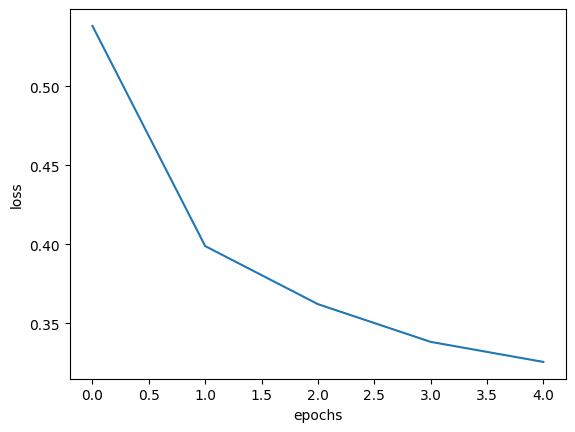

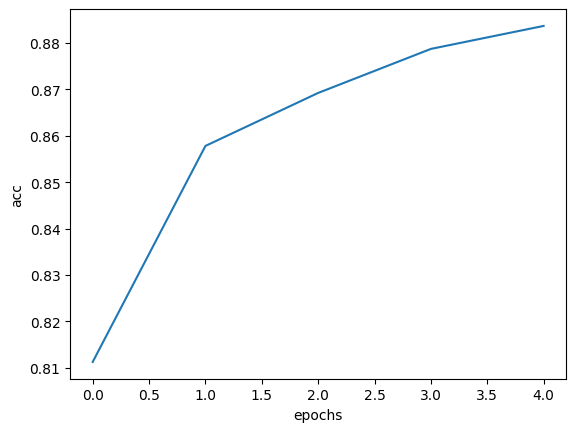

In [4]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
# plt.plot(history.history['acc'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()

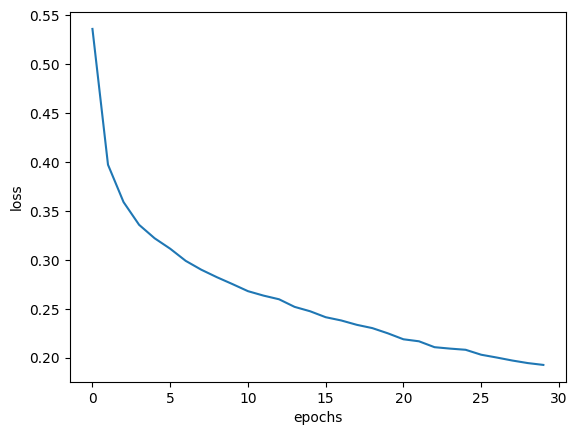

In [5]:
# 에포크를 늘려서 그래프를 다시본다.
model =model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='acc')
history = model.fit(x_train_scaled,y_train,epochs=30,verbose=0)
plt.plot(history.history['loss'])
# plt.plot(history.history['acc'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# 계속 줄어든다 먼가 이상하다 => 과대적합

In [6]:
# 인공신경망은 정확도가 아니라 손실함수가 최적화의 대상이다.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='acc')
history = model.fit(x_train_scaled,y_train,epochs=20,verbose=0,\
    validation_data=(x_val_scaled,y_val))
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


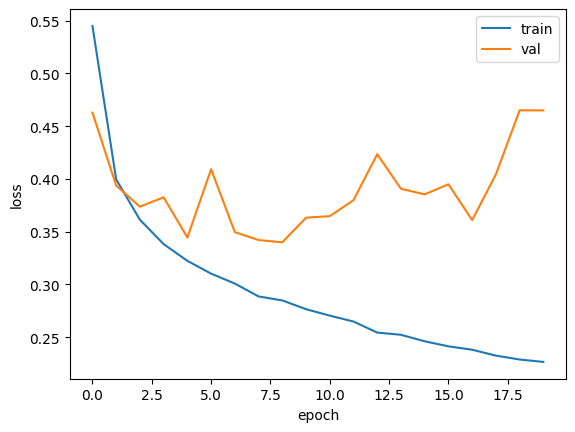

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 훈련손실은 꾸준히 감소하여 과대적합된다. 따라서 검증손실이 상승하는 에포크때가 
# 적당한 학습횟수일것이다.
# 옵티마이저 하이퍼 파라미터를 조정해서 과대적합 완화해볼것이다. 

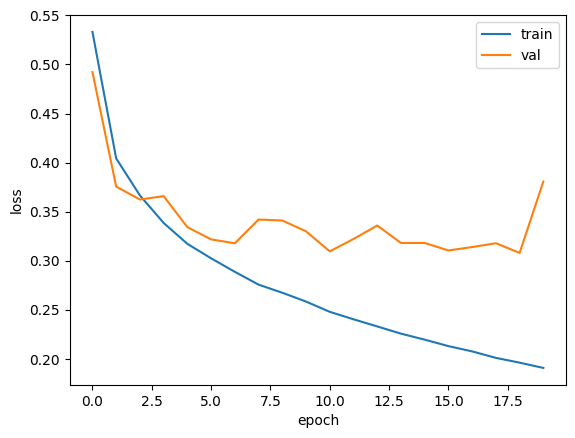

In [8]:
# adam optimizer로 해볼것이다.
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', \
    metrics='acc')
history = model.fit(x_train_scaled, y_train, epochs=20,verbose=0,\
    validation_data=(x_val_scaled,y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 과대적합이 훨씬 줄었다 => 학습률을 조정해서 더나은 손실곡성을 얻을 수도있다.


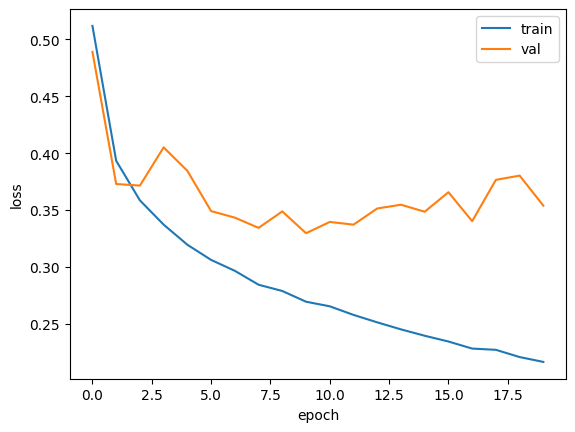

In [9]:
# 학습률 0.003으로 조정 => 더안좋아졌다
model = model_fn()
optimizer= keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', \
    metrics='acc')
history = model.fit(x_train_scaled, y_train, epochs=20,verbose=0,\
    validation_data=(x_val_scaled,y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

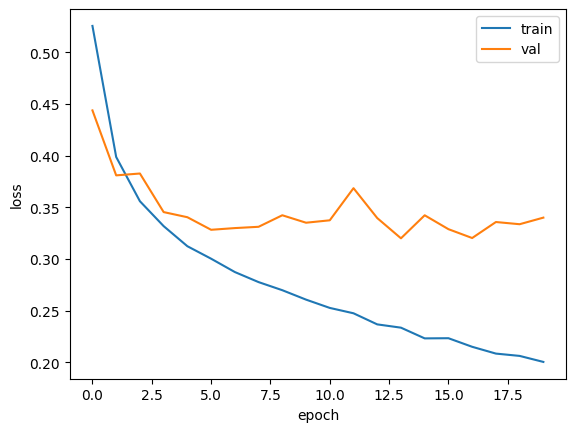

In [10]:
# 학습률 0.002으로 조정 =>  나아진게 없다
model = model_fn()
optimizer= keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', \
    metrics='acc')
history = model.fit(x_train_scaled, y_train, epochs=20,verbose=0,\
    validation_data=(x_val_scaled,y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [11]:
# 드롭아웃: 은닉층을 일부 작동하지 않게 하여 과대적합을 방지한다.
# => 특정뉴런에 의존하는 행위를 방지함으로써
# => 마치 다른2개의 신경망이 앙상블하는것과 같다. 이는 과대적합을 막기 좋은 방법
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

# 훈련이 끝난뒤 평가나 예측할때는 드롭아웃을 적용하면 안된다 => 자동으로해준다.


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


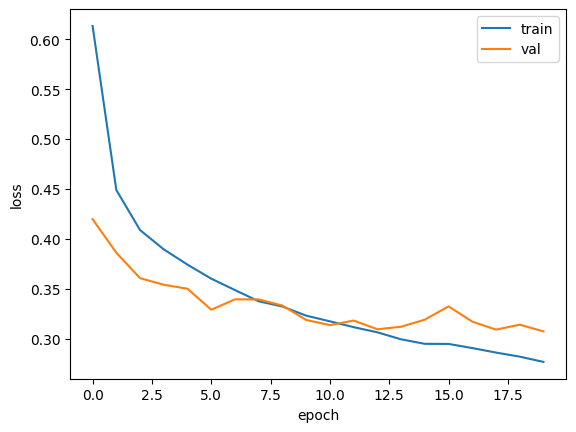

In [12]:
# 드롭아웃 적용 모델
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',\
    metrics='acc')
history = model.fit(x_train_scaled,y_train,epochs=20,verbose=0,\
    validation_data=(x_val_scaled,y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# epoch 10정도에서 검증손실이 안정화되었다. 
# 이후에는 계속된 학습으로 과대적합되며 간격이 벌어진다 => epoch 10정도로 다시훈련하면된다.

In [13]:
# 모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',\
    metrics='acc')
history = model.fit(x_train_scaled,y_train,epochs=10,verbose=0,\
    validation_data=(x_val_scaled,y_val))
# 모델의 파라미터만 저장
model.save_weights('model-weights.h5')
# 모델구조와 파라미터 저장
model.save('model-whole.keras')


In [14]:
# 1.훈련하지 않은 모델을 만들어 앞서 저장한 모델 파라미터를 읽어 사용
# 2. 모델의 구조와 파라미터를 불러와 새로운 모델을 만들어 바로 사용
 
model = model_fn(keras.layers.Dropout(0.3))
# 종일한 구조의 모델에 앞서 학습한 파라미터값만 읽어온다
model.load_weights('./model-weights.h5')

import numpy as np
val_labels = np.argmax(model.predict(x_val_scaled),axis=-1)
print(np.mean(val_labels == y_val))

#2
model = keras.models.load_model('./model-whole.keras')
model.evaluate(x_val_scaled,y_val)
# 같은걸 불러왔기 때문에 동일한 정확도이다.

469/469 [==============================] - 2s 3ms/step
0.8803333333333333
469/469 [==============================] - 2s 3ms/step - loss: 0.3274 - acc: 0.8803


[0.3274253308773041, 0.8803333044052124]

In [15]:
# 모델을 훈련하고 최적점을 찾아내고 다시 훈련했다
# 그런데 케라스의 콜백패키지를 쓰면 한번에 과정을 진행할수있다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
    metrics='acc')

# 검증손실점수가 가장 좋은 파라미터만 저장한다/
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
    save_best_only=True)
model.fit(x_train_scaled,y_train,epochs=20,verbose=0,
    validation_data=(x_val_scaled,y_val),
    callbacks=[checkpoint_cb]) 

c:\Users\82105\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
#최상의 모델 불러오기
model = keras.saving.load_model('best-model.h5')
model.evaluate(x_val_scaled,y_val)
#최적의 점수가 나오더라도 계속 훈련한다. 때문에 중지해야한다 ==early stop

469/469 [==============================] - 2s 3ms/step - loss: 0.3044 - acc: 0.8908


[0.3043627142906189, 0.8907999992370605]

In [17]:
# 과대적합이 커지기 전에 조기종료한다
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='acc')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(x_train_scaled,y_train, epochs=20, verbose=0,
                    validation_data=(x_val_scaled,y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])


c:\Users\82105\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7


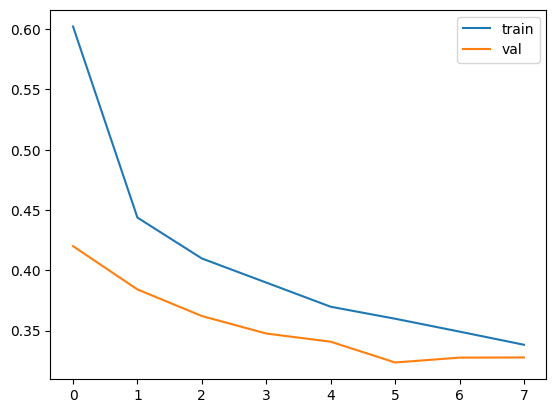

469/469 [==============================] - 1s 3ms/step - loss: 0.3236 - acc: 0.8811


[0.3236036002635956, 0.8810666799545288]

In [20]:
print(early_stopping_cb.stopped_epoch)  
#0 부터기 때문에 ep= 8에서 중지, patience =2이기때무에  ep=6에서 최상이다 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()
# 조기종료를 사용하면 에폭수를 안심하고 크게해도 된다.
model.evaluate(x_val_scaled,y_val)